In [1]:
from windwhisper import windturbines

In [8]:
wind_turbines = [
    {"name": "Turbine 1", "power": 2.5e3, "diameter": 100, "hub height": 80, "position": (47.346060, 8.508267)},
    {"name": "Turbine 2", "power": 3.0e3, "diameter": 105, "hub height": 85, "position": (47.3869, 8.5517)},
    #{"name": "Turbine 3", "power": 3.5e3, "diameter": 110, "hub height": 90, "position": (47.3969, 8.5617)},
    #{"name": "Turbine 4", "power": 4.0e3, "diameter": 115, "hub height": 95, "position": (47.3869, 8.5317)},
    #{"name": "Turbine 5", "power": 4.0e3, "diameter": 120, "hub height": 95, "position": (47.34955801547433, 8.491580864126439)},
]

listening_points = [
    {"name": "Listener 1", "position": (47.3769, 8.5517)},
    {"name": "Listener 2", "position": (47.3869, 8.5617)},
    {"name": "Listener 3", "position": (47.3461, 8.5175)},
]


wt = windturbines.WindTurbines(wind_turbines=wind_turbines, listeners=listening_points,)


In [9]:
wt.fetch_wind_speeds(debug=True)

/Users/maximebalandret/opt/anaconda3/envs/noise/lib/python3.10/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')


In [4]:
wt.fetch_noise_map()

[{'turbine_name': 'Turbine 1', 'turbine_position': (47.34606, 8.508267), 'listener_name': 'Listener 1', 'listener_position': (47.3769, 8.5517), 'distance': 4739.384368091734}, {'turbine_name': 'Turbine 1', 'turbine_position': (47.34606, 8.508267), 'listener_name': 'Listener 2', 'listener_position': (47.3869, 8.5617), 'distance': 6067.685257970055}, {'turbine_name': 'Turbine 1', 'turbine_position': (47.34606, 8.508267), 'listener_name': 'Listener 3', 'listener_position': (47.3461, 8.5175), 'distance': 695.6494188726895}, {'turbine_name': 'Turbine 2', 'turbine_position': (47.3869, 8.5517), 'listener_name': 'Listener 1', 'listener_position': (47.3769, 8.5517), 'distance': 1111.9508023352598}, {'turbine_name': 'Turbine 2', 'turbine_position': (47.3869, 8.5517), 'listener_name': 'Listener 2', 'listener_position': (47.3869, 8.5617), 'distance': 752.8398985459942}, {'turbine_name': 'Turbine 2', 'turbine_position': (47.3869, 8.5517), 'listener_name': 'Listener 3', 'listener_position': (47.3461

In [5]:
wt.noise_map.superpose_several_wind_turbine_sounds()

[{'turbine_name': 'Turbine 1', 'turbine_position': (47.34606, 8.508267), 'listener_name': 'Listener 1', 'listener_position': (47.3769, 8.5517), 'distance': 4739.384368091734}, {'turbine_name': 'Turbine 1', 'turbine_position': (47.34606, 8.508267), 'listener_name': 'Listener 2', 'listener_position': (47.3869, 8.5617), 'distance': 6067.685257970055}, {'turbine_name': 'Turbine 1', 'turbine_position': (47.34606, 8.508267), 'listener_name': 'Listener 3', 'listener_position': (47.3461, 8.5175), 'distance': 695.6494188726895}, {'turbine_name': 'Turbine 2', 'turbine_position': (47.3869, 8.5517), 'listener_name': 'Listener 1', 'listener_position': (47.3769, 8.5517), 'distance': 1111.9508023352598}, {'turbine_name': 'Turbine 2', 'turbine_position': (47.3869, 8.5517), 'listener_name': 'Listener 2', 'listener_position': (47.3869, 8.5617), 'distance': 752.8398985459942}, {'turbine_name': 'Turbine 2', 'turbine_position': (47.3869, 8.5517), 'listener_name': 'Listener 3', 'listener_position': (47.3461

([{'turbine_name': 'Turbine 1',
   'turbine_position': (47.34606, 8.508267),
   'listener_name': 'Listener 1',
   'listener_position': (47.3769, 8.5517),
   'distance': 4739.384368091734,
   'intensity_level': array([8.19839453e-13, 1.46189062e-12, 4.79182961e-12, 1.05939139e-11,
          1.35215119e-11, 1.31779212e-11, 1.37284396e-11, 1.44906930e-11,
          1.42106763e-11, 1.40407048e-11])},
  {'turbine_name': 'Turbine 1',
   'turbine_position': (47.34606, 8.508267),
   'listener_name': 'Listener 2',
   'listener_position': (47.3869, 8.5617),
   'distance': 6067.685257970055,
   'intensity_level': array([2.71310380e-13, 4.83785084e-13, 1.58576549e-12, 3.50585569e-12,
          4.47468894e-12, 4.36098408e-12, 4.54316776e-12, 4.79542111e-12,
          4.70275489e-12, 4.64650603e-12])},
  {'turbine_name': 'Turbine 1',
   'turbine_position': (47.34606, 8.508267),
   'listener_name': 'Listener 3',
   'listener_position': (47.3461, 8.5175),
   'distance': 695.6494188726895,
   'intensit

In [6]:
wt.noise_map.generate_noise_map()

In [7]:
wt.noise_map.plot_noise_map()

interactive(children=(FloatSlider(value=7.0, description='Wind Speed (m/s):', max=12.0, min=3.0, step=1.0), Ou…

In [8]:
wt.noise_map.

SyntaxError: invalid syntax (800052328.py, line 1)

In [9]:
wt.noise_map.plot_relief_between_points()

TypeError: NoiseMap.plot_relief_between_points() missing 2 required positional arguments: 'wind_turbines' and 'observation_points'

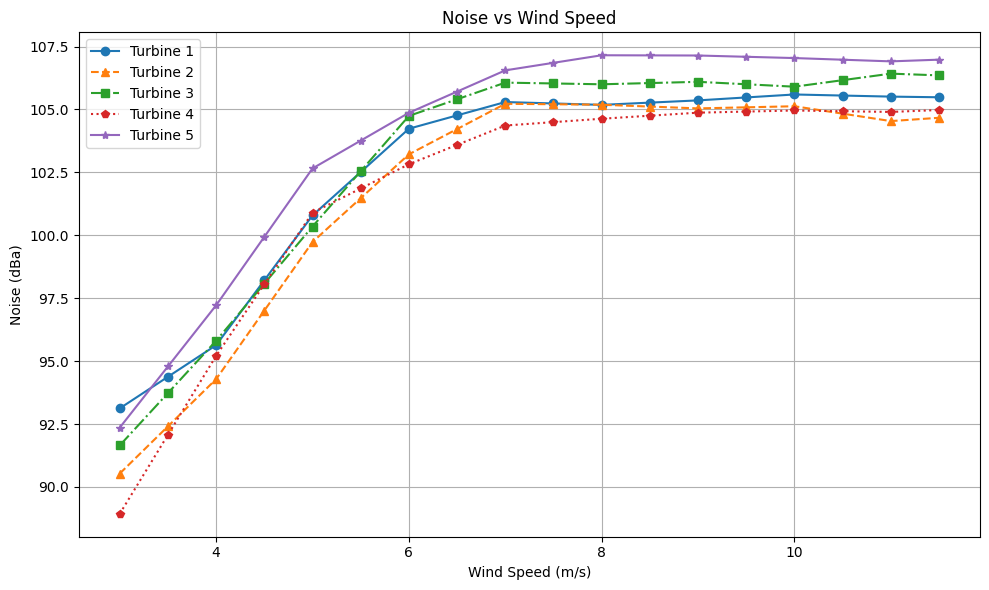

In [10]:
wt.plot_noise_curve()

In [10]:
wt.analyze_noise()

In [11]:
wt.na.wind_speed.sel(variable="WS10")

<xarray.DataArray (turbine: 2, time: 52608)>
array([[0.8704885, 1.4370455, 1.7163366, ..., 1.4840467, 1.3285879,
        1.3531564],
       [2.0572448, 2.1318624, 2.0345478, ..., 1.1287701, 1.2553074,
        1.052733 ]], dtype=float32)
Coordinates:
  * time      (time) datetime64[ns] 2016-01-01 ... 2018-12-31T23:30:00
  * turbine   (turbine) object 'Turbine 1' 'Turbine 2'
    variable  <U4 'WS10'
Attributes: (12/138)
    ADAPT_DT_MAX:                    15.0
    ADAPT_DT_MIN:                    3.0
    ADAPT_DT_START:                  13.0
    AER_ANGEXP_OPT:                  1
    AER_ANGEXP_VAL:                  1.2999999523162842
    AER_AOD550_OPT:                  1
    ...                              ...
    eastBoundLongitude:              8.508267
    verticalExtentMinimum:           50.0
    verticalExtentMaximum:           500.0
    temporalExtentMinimum:           2016-01-01T00:00:00
    temporalExtentMaximum:           2018-12-31T23:30:00
    subset_pid:                      https://wps.neweuropeanwindatlas.eu/api/...

In [17]:
wt.na.noise

<xarray.DataArray (turbine: 2, wind_speed: 10)>
array([[ 93.12259415,  95.6344548 , 100.79031968, 104.23587041,
        105.29555857, 105.18377507, 105.3615178 , 105.59619756,
        105.51145349, 105.45919511],
       [ 90.53188794,  94.28483202,  99.73278739, 103.21867918,
        105.22704265, 105.18888759, 105.04308884, 105.12864198,
        104.5392056 , 104.80122827]])
Coordinates:
  * turbine     (turbine) <U9 'Turbine 1' 'Turbine 2'
  * wind_speed  (wind_speed) float64 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0

In [18]:
wt.na.noise.sel(turbine="Turbine 1").interp(wt.na.wind_speed.sel(variable="WS10", turbine="Turbine 1").values)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [6]:
wt.noise

<xarray.DataArray (turbine: 5, wind_speed: 10)>
array([[ 93.12259415,  95.6344548 , 100.79031968, 104.23587041,
        105.29555857, 105.18377507, 105.3615178 , 105.59619756,
        105.51145349, 105.45919511],
       [ 90.53188794,  94.28483202,  99.73278739, 103.21867918,
        105.22704265, 105.18888759, 105.04308884, 105.12864198,
        104.5392056 , 104.80122827],
       [ 91.65023356,  95.81009227, 100.34919991, 104.74511418,
        106.06722633, 106.00110654, 106.09903508, 105.90556801,
        106.42444963, 106.2862498 ],
       [ 88.93339104,  95.21038508, 100.89692343, 102.82466829,
        104.36270457, 104.63226408, 104.87353416, 104.95980916,
        104.90224363, 105.05634335],
       [ 92.35752798,  97.21961589, 102.65760376, 104.86892874,
        106.55481959, 107.15476983, 107.14490506, 107.04331315,
        106.91218381, 107.04703156]])
Coordinates:
  * turbine     (turbine) <U9 'Turbine 1' 'Turbine 2' ... 'Turbine 5'
  * wind_speed  (wind_speed) float64 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0

In [17]:
wt.fetch_noise_map()

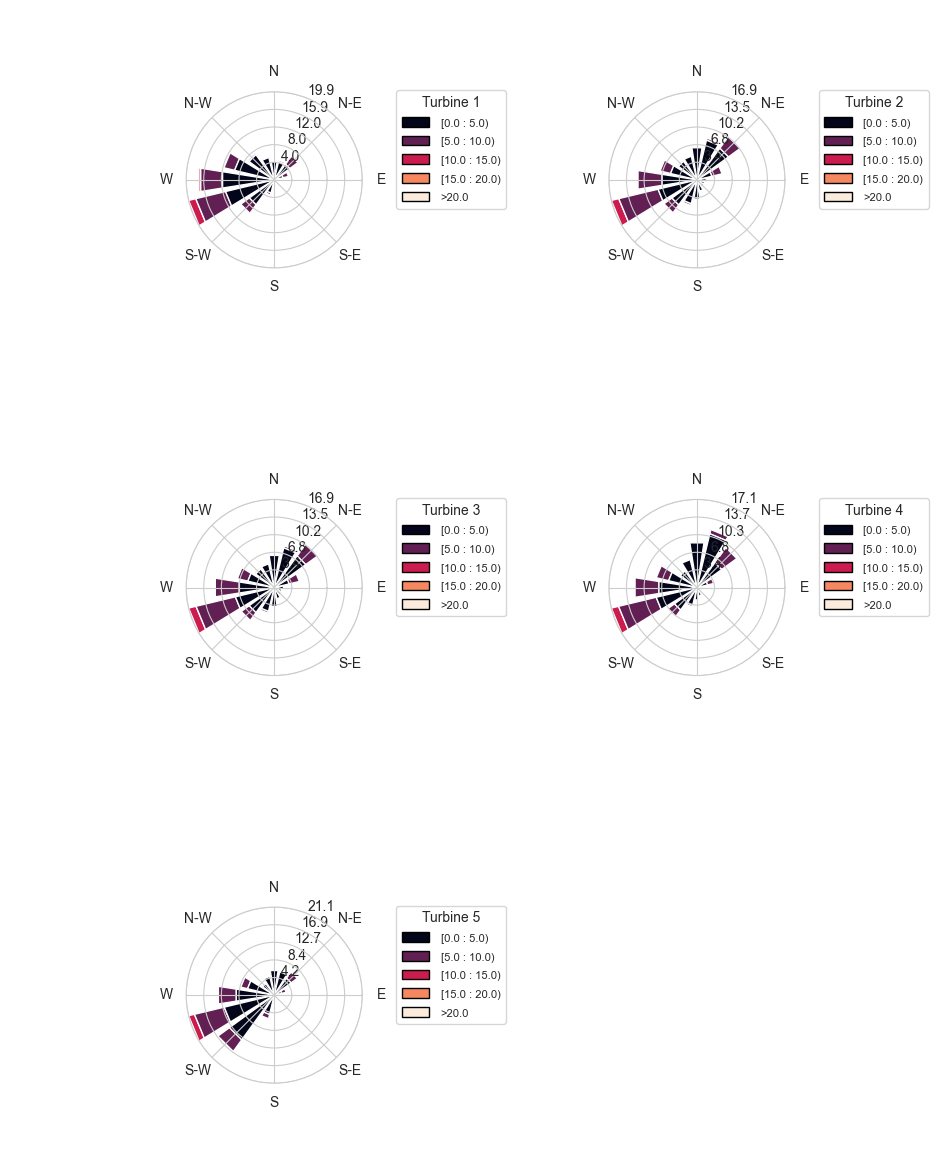

In [23]:
wt.ws.create_wind_roses()

In [12]:
wt.ws.download_weibull_coefficients()

{'Turbine 1': {'A': masked_array(data=[4.3577623],
               mask=False,
         fill_value=1e+20,
              dtype=float32),
  'k': masked_array(data=[1.4160156],
               mask=False,
         fill_value=1e+20,
              dtype=float32)},
 'Turbine 2': {'A': masked_array(data=[4.8460517],
               mask=False,
         fill_value=1e+20,
              dtype=float32),
  'k': masked_array(data=[1.4003906],
               mask=False,
         fill_value=1e+20,
              dtype=float32)},
 'Turbine 3': {'A': masked_array(data=[5.463169],
               mask=False,
         fill_value=1e+20,
              dtype=float32),
  'k': masked_array(data=[1.3691406],
               mask=False,
         fill_value=1e+20,
              dtype=float32)},
 'Turbine 4': {'A': masked_array(data=[4.1518517],
               mask=False,
         fill_value=1e+20,
              dtype=float32),
  'k': masked_array(data=[1.4042969],
               mask=False,
         fill_value=1e+20,


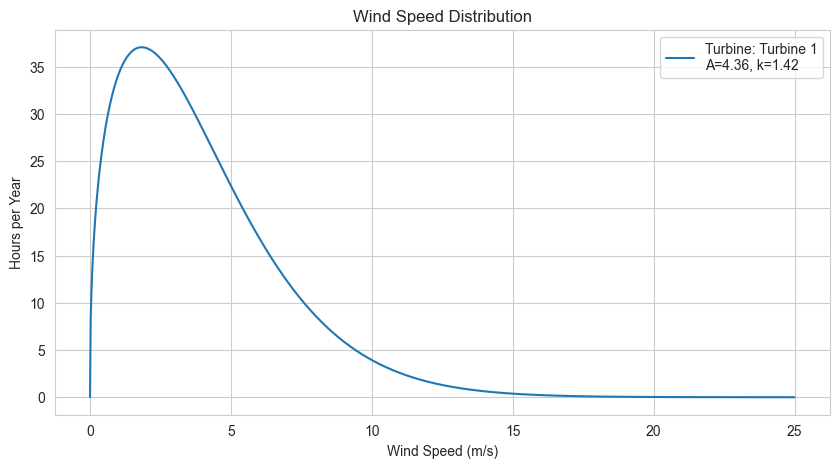

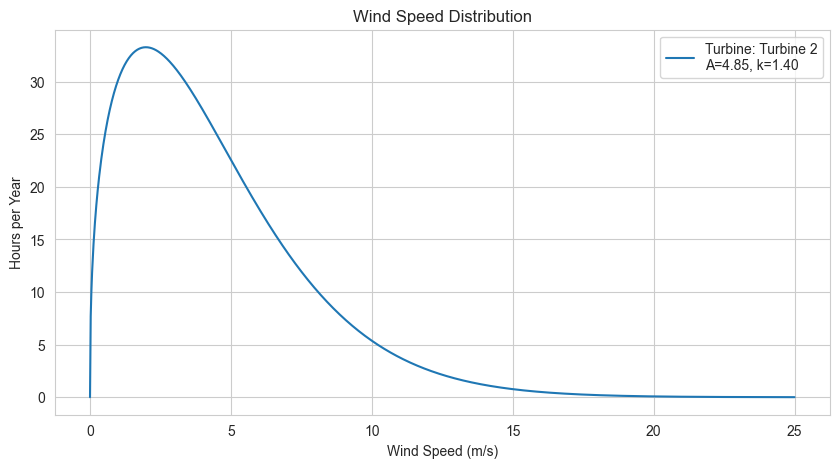

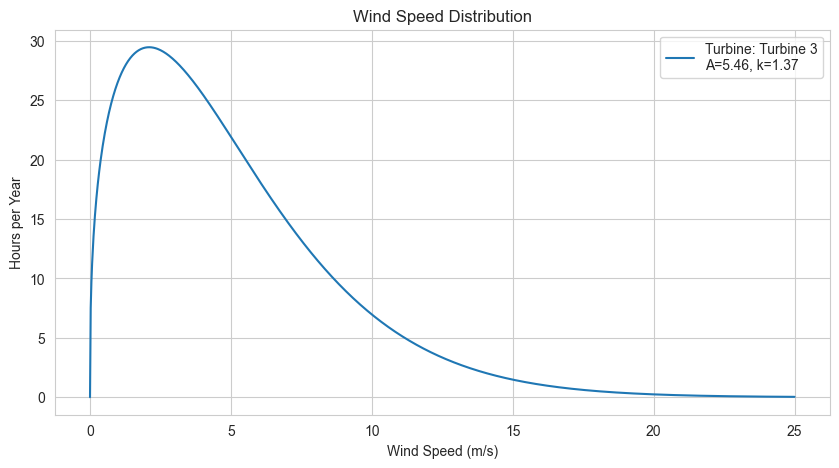

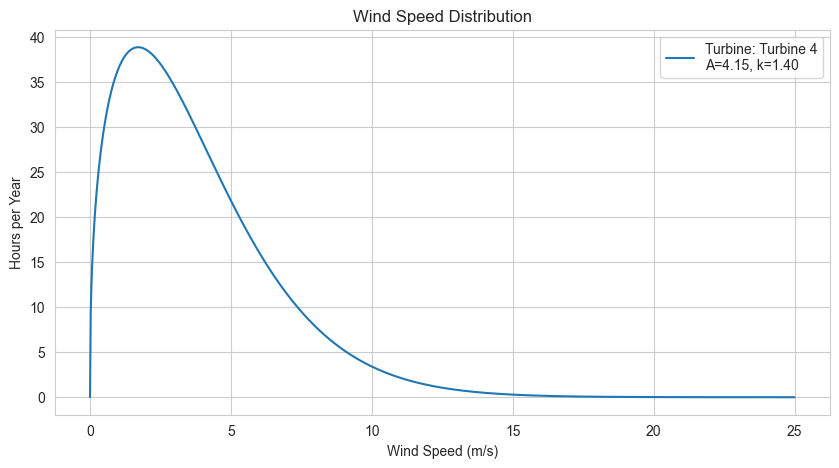

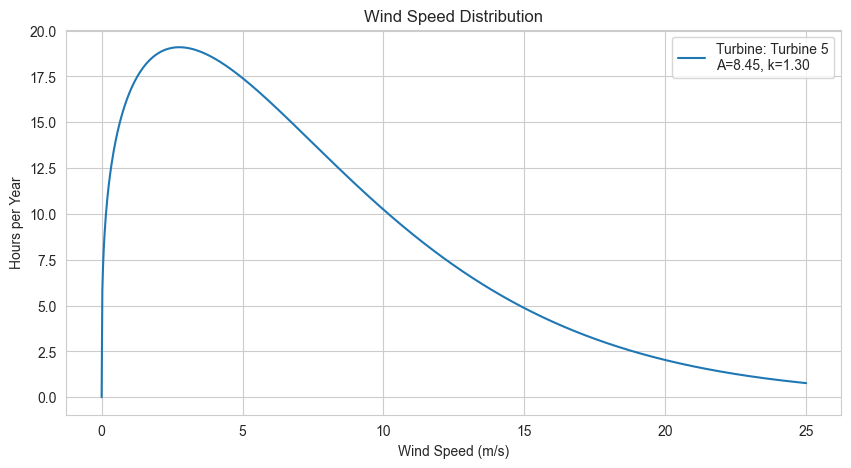

In [13]:
wt.ws.plot_weibull_wind_speed_distribution()

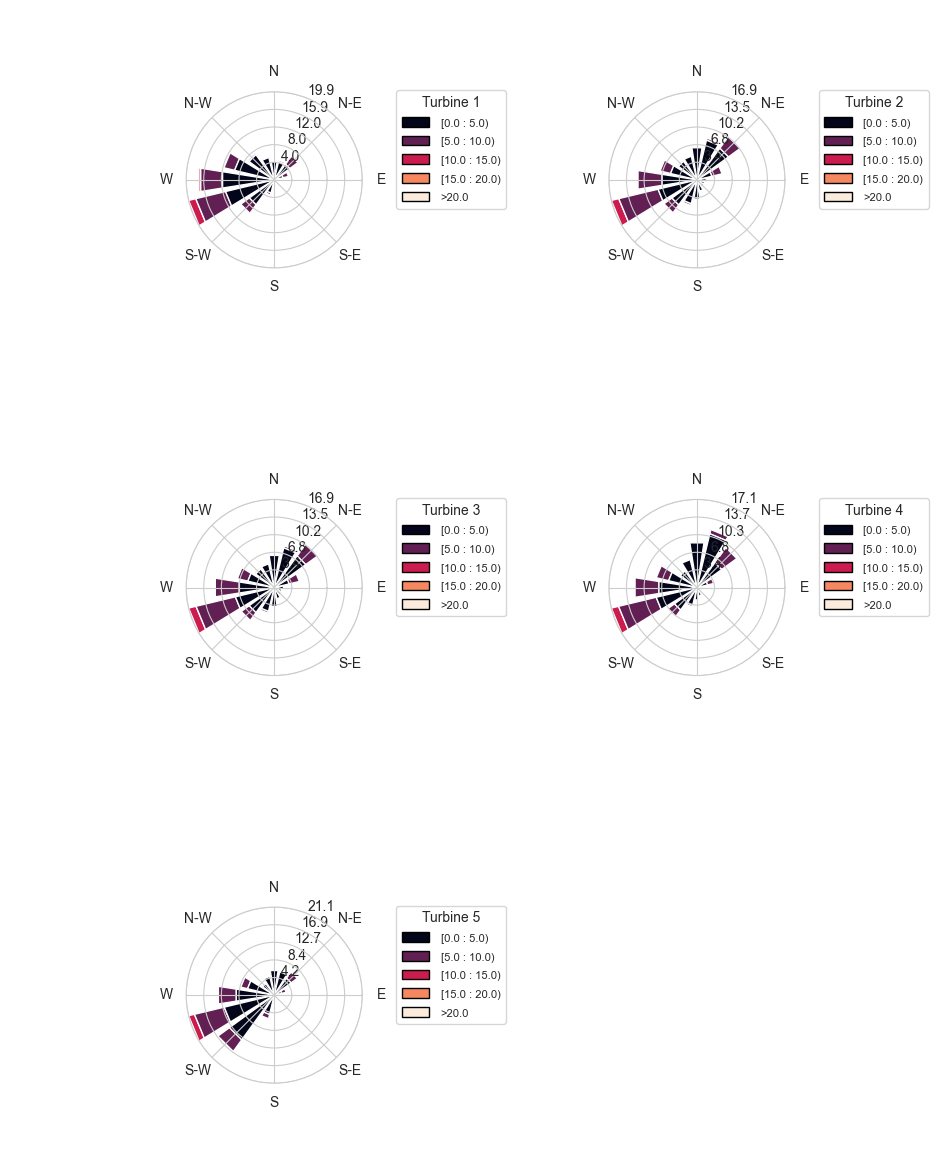

In [14]:
wt.ws.create_wind_roses()

In [24]:
wt.fetch_noise_map()

In [26]:
wt.noise_map

In [18]:
wt.noise

<xarray.DataArray (turbine: 5, wind_speed: 10)>
array([[ 93.12259415,  95.6344548 , 100.79031968, 104.23587041,
        105.29555857, 105.18377507, 105.3615178 , 105.59619756,
        105.51145349, 105.45919511],
       [ 90.53188794,  94.28483202,  99.73278739, 103.21867918,
        105.22704265, 105.18888759, 105.04308884, 105.12864198,
        104.5392056 , 104.80122827],
       [ 91.65023356,  95.81009227, 100.34919991, 104.74511418,
        106.06722633, 106.00110654, 106.09903508, 105.90556801,
        106.42444963, 106.2862498 ],
       [ 88.93339104,  95.21038508, 100.89692343, 102.82466829,
        104.36270457, 104.63226408, 104.87353416, 104.95980916,
        104.90224363, 105.05634335],
       [ 92.35752798,  97.21961589, 102.65760376, 104.86892874,
        106.55481959, 107.15476983, 107.14490506, 107.04331315,
        106.91218381, 107.04703156]])
Coordinates:
  * turbine     (turbine) <U9 'Turbine 1' 'Turbine 2' ... 'Turbine 5'
  * wind_speed  (wind_speed) float64 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0

In [28]:
wt.noise_map.plot_noise_map()

interactive(children=(FloatSlider(value=7.0, description='Wind Speed (m/s):', max=12.0, min=3.0, step=1.0), Ou…

In [27]:
wt.noise_map.display_turbines_on_map()

In [6]:
wt.wind_turbines

[{'name': 'Turbine 1',
  'power': 2500.0,
  'diameter': 100.0,
  'hub height': 80.0,
  'position': (47.34606, 8.508267)},
 {'name': 'Turbine 2',
  'power': 3000.0,
  'diameter': 105.0,
  'hub height': 85.0,
  'position': (47.3869, 8.5517)}]

In [7]:
wt.listeners

[{'name': 'Listener 1', 'position': (47.3769, 8.5517)},
 {'name': 'Listener 2', 'position': (47.3869, 8.5617)},
 {'name': 'Listener 3', 'position': (47.346188367055674, 8.507587721502468)}]

In [ ]:
n.whatsmyname()

In [9]:
import requests
import netCDF4
import tempfile
import os

url = "https://wps.neweuropeanwindatlas.eu/api/microscale-atlas/v1/get-data-point?latitude=47.074798&longitude=7.684937&height=50&variable=wind_speed&variable=weib_A_combined&variable=weib_k_combined"

try:
    response = requests.get(url, timeout=20)
    response.raise_for_status()
except requests.RequestException as e:
    print(f"Request failed: {e}")

else:
    # Save the file temporarily
    with tempfile.NamedTemporaryFile(delete=False) as tmp_file:
        tmp_file_name = tmp_file.name
        tmp_file.write(response.content)

    # Load the data into a netCDF4 dataset
    try:
        with netCDF4.Dataset(tmp_file_name, mode='r') as ds:
            # Extract wind speed, A, and k values
            wind_speed = ds['wind_speed'][:]
            weib_A_combined = ds['weib_A_combined'][:]
            weib_k_combined = ds['weib_k_combined'][:]

            print("Wind Speed:", wind_speed)
            print("Weibull A:", weib_A_combined)
            print("Weibull k:", weib_k_combined)
    finally:
        # Delete the temporary file
        os.remove(tmp_file_name)


Wind Speed: [5.7135005]
Weibull A: [6.345123]
Weibull k: [1.5332031]
